In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
!pip3 install xlrd

    100% |████████████████████████████████| 112kB 246kB/s ta 0:00:01


In [4]:
df = pd.read_excel('indicator life_expectancy_at_birth.xlsx')

In [5]:
df.head()

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


In [6]:
df.shape

(260, 218)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Columns: 218 entries, Life expectancy to 2016
dtypes: float64(217), object(1)
memory usage: 442.9+ KB


In [15]:
df.columns[1]

1800

In [13]:
df.dtypes

Life expectancy     object
1800               float64
1801               float64
1802               float64
1803               float64
1804               float64
1805               float64
1806               float64
1807               float64
1808               float64
1809               float64
1810               float64
1811               float64
1812               float64
1813               float64
1814               float64
1815               float64
1816               float64
1817               float64
1818               float64
1819               float64
1820               float64
1821               float64
1822               float64
1823               float64
1824               float64
1825               float64
1826               float64
1827               float64
1828               float64
                    ...   
1987               float64
1988               float64
1989               float64
1990               float64
1991               float64
1992               float64
1

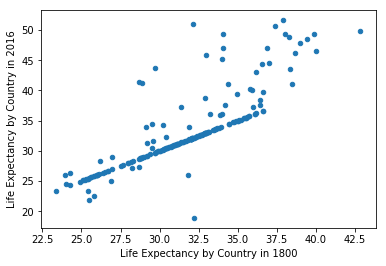

In [23]:
df.plot(kind='scatter',x=1800,y=1899)
plt.xlabel('Life Expectancy by Country in 1800')
plt.ylabel('Life Expectancy by Country in 2016')
# plt.xlim(20, 55)
# plt.ylim(20, 55)
plt.show()

* here are a surprising number of countries that fall on the diagonal line. In fact, examining the DataFrame reveals that the life expectancy for 140 of the 260 countries did not change at all in the 19th century! This is possibly a result of not having access to the data for all the years back then. In this way, visualizing your data can help you uncover insights as well as diagnose it for errors.

In [24]:
def check_null_or_valid(row_data):
    """Function that takes a row of data,
    drops all missing values,
    and checks if all remaining values are greater than or equal to 0
    """
    no_na = row_data.dropna()[1:-1]
    numeric = pd.to_numeric(no_na)
    ge0 = numeric >= 0
    return ge0

# Check whether the first column is 'Life expectancy'
assert df.columns[0] == 'Life expectancy'

# Check whether the values in the row are valid
assert df.iloc[:, 1:].apply(check_null_or_valid, axis=1).all().all()

# Check that there is only one instance of each country
assert df['Life expectancy'].value_counts()[0] == 1

In [72]:
import glob
import re

In [73]:
pattern = re.compile('[a-z]\_\d*.csv')

In [74]:
list_files = glob.glob('csv_*.csv')


In [75]:
list_files

['csv_1800.csv', 'csv_1900.csv', 'csv_2000.csv']

In [76]:
list_data = []
for filename in list_files:
    df = pd.read_csv(filename)
    list_data.append(df)

In [77]:
df.dtypes

Unnamed: 0           int64
2001               float64
2002               float64
2003               float64
2004               float64
2005               float64
2006               float64
2007               float64
2008               float64
2009               float64
2010               float64
2011               float64
2012               float64
2013               float64
2014               float64
2015               float64
2016               float64
Life expectancy     object
dtype: object

In [78]:
list_data

[     Unnamed: 0           Life expectancy   1800   1801   1802   1803   1804  \
 0             0                  Abkhazia    NaN    NaN    NaN    NaN    NaN   
 1             1               Afghanistan  28.21  28.20  28.19  28.18  28.17   
 2             2     Akrotiri and Dhekelia    NaN    NaN    NaN    NaN    NaN   
 3             3                   Albania  35.40  35.40  35.40  35.40  35.40   
 4             4                   Algeria  28.82  28.82  28.82  28.82  28.82   
 5             5            American Samoa    NaN    NaN    NaN    NaN    NaN   
 6             6                   Andorra    NaN    NaN    NaN    NaN    NaN   
 7             7                    Angola  26.98  26.98  26.98  26.98  26.98   
 8             8                  Anguilla    NaN    NaN    NaN    NaN    NaN   
 9             9       Antigua and Barbuda  33.54  33.54  33.54  33.54  33.54   
 10           10                 Argentina  33.20  33.20  33.20  33.20  33.20   
 11           11            

In [79]:
data = pd.concat(list_data)

In [80]:
data.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2009,2010,2011,2012,2013,2014,2015,2016,Life expectancy,Unnamed: 0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,0
1,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan,1
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Akrotiri and Dhekelia,2
3,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albania,3
4,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Algeria,4


In [81]:
data = data.drop('Unnamed: 0',axis=1)

In [82]:
data_melt = pd.melt(data,id_vars='Life expectancy')
data_melt.columns = ['country','year','life_expectancy']

In [83]:
data_melt.head()

,country,year,life_expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82


In [84]:
data_melt.tail(100)

,country,year,life_expectancy
167600,New Zealand,2016,81.40
167601,Ngorno-Karabakh,2016,NaN
167602,Nicaragua,2016,78.20
167603,Niger,2016,61.30
167604,Nigeria,2016,65.51
167605,Niue,2016,NaN
167606,Norfolk Island,2016,NaN
167607,Northern Cyprus,2016,NaN
167608,Northern Mariana Islands,2016,76.20
167609,Norway,2016,82.00


In [85]:
data_melt.dtypes


country             object
year                object
life_expectancy    float64
dtype: object

In [86]:
data_melt.year = pd.to_numeric(data_melt.year)


In [87]:
assert data_melt.country.dtypes == np.object
assert data_melt.year.dtypes == np.int64
assert data_melt.life_expectancy.dtypes == np.float64

In [89]:
data_melt['country'].value_counts(dropna=False)

Jamaica                     645
Georgia                     645
Japan                       645
Chad                        645
Solomon Islands             645
Luxembourg                  645
Macedonia, FYR              645
Paraguay                    645
Western Sahara              645
Belgium                     645
Dominican Republic          645
Bulgaria                    645
Jersey                      645
Cameroon                    645
Uruguay                     645
Senegal                     645
Greece                      645
French Polynesia            645
Mongolia                    645
Bermuda                     645
Namibia                     645
Brazil                      645
Mali                        645
Ethiopia                    645
Tajikistan                  645
Qatar                       645
Liberia                     645
Trinidad and Tobago         645
Papua New Guinea            645
United Arab Emirates        645
                           ... 
Costa Ri

In [90]:
# Create the series of countries: countries
countries = data_melt['country']

# Drop all the duplicates from countries
countries = countries.drop_duplicates()

# Write the regular expression: pattern
pattern = '^[A-Za-z\.\s]*$'

# Create the Boolean vector: mask
mask = countries.str.contains(pattern)

# Invert the mask: mask_inverse
mask_inverse = ~mask

# Subset countries using mask_inverse: invalid_countries
invalid_countries = countries.loc[mask_inverse]

# Print invalid_countries
print(invalid_countries)


49            Congo, Dem. Rep.
50                 Congo, Rep.
53               Cote d'Ivoire
73      Falkland Is (Malvinas)
93               Guinea-Bissau
98            Hong Kong, China
118    United Korea (former)\n
131               Macao, China
132             Macedonia, FYR
145      Micronesia, Fed. Sts.
161            Ngorno-Karabakh
187             St. Barthélemy
193     St.-Pierre-et-Miquelon
225                Timor-Leste
251      Virgin Islands (U.S.)
252       North Yemen (former)
253       South Yemen (former)
258                      Åland
Name: country, dtype: object


In [91]:
assert pd.notnull(data_melt.country).all()

In [92]:
data_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167700 entries, 0 to 167699
Data columns (total 3 columns):
country            167700 non-null object
year               167700 non-null int64
life_expectancy    43447 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.8+ MB


year
1800    31.486020
1801    31.448905
1802    31.463483
1803    31.377413
1804    31.446318
Name: life_expectancy, dtype: float64
year
2012    71.663077
2013    71.916106
2014    72.088125
2015    72.321010
2016    72.556635
Name: life_expectancy, dtype: float64


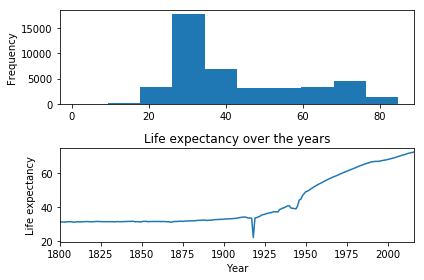

In [94]:
# Add first subplot
plt.subplot(2, 1, 1) 

# Create a histogram of life_expectancy
data_melt.life_expectancy.plot(kind='hist')

# Group gapminder: gapminder_agg
gapminder_agg = data_melt.groupby('year')['life_expectancy'].mean()

# Print the head of gapminder_agg
print(gapminder_agg.head())

# Print the tail of gapminder_agg
print(gapminder_agg.tail())

# Add second subplot
plt.subplot(2, 1, 2)

# Create a line plot of life expectancy per year
gapminder_agg.plot()

# Add title and specify axis labels
plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy')
plt.xlabel('Year')

# Display the plots
plt.tight_layout()
plt.show()

# Save both DataFrames to csv files
data_melt.to_csv('gapminder.csv')
gapminder_agg.to_csv('gapminder_agg.csv')


In [102]:
US = data_melt[data_melt['country'] == 'United States']


In [103]:
US = US.drop_duplicates()

In [106]:
US =  US.dropna()

In [107]:
US


,country,year,life_expectancy
240,United States,1800,39.41
1020,United States,1801,39.41
1800,United States,1802,39.41
2580,United States,1803,39.41
3360,United States,1804,39.41
4140,United States,1805,39.41
4920,United States,1806,39.41
5700,United States,1807,39.41
6480,United States,1808,39.41
7260,United States,1809,39.41


In [109]:
India = data_melt[data_melt['country'] == 'India']
India = India.drop_duplicates()
India =  India.dropna()

In [121]:
ger= data_melt[data_melt['country'] == 'Germany']
ger= ger.drop_duplicates()
ger=  ger.dropna()

In [125]:
sing= data_melt[data_melt['country'] == 'Singapore']
sing = sing.drop_duplicates()
sing =  sing.dropna()

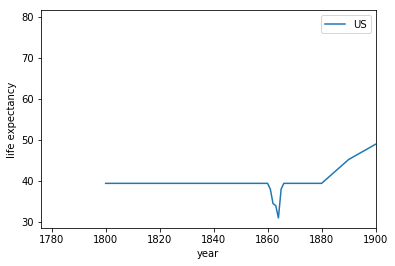

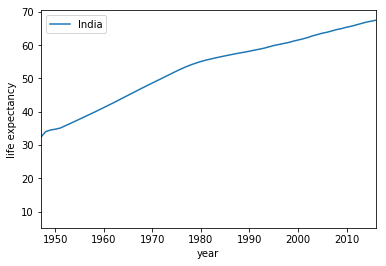

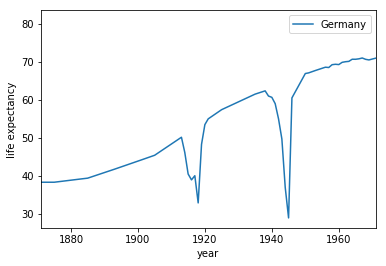

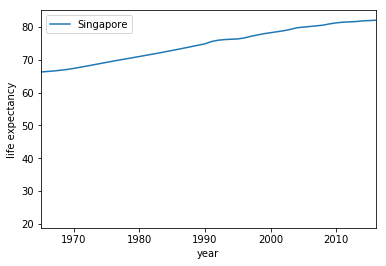

In [126]:

US.plot(kind='line',x='year',y='life_expectancy',label='US')
plt.xlim(1776, 1900)
# plt.ylim(20, 55)
plt.ylabel('life expectancy')
plt.show()

India.plot(kind='line',x='year',y='life_expectancy',label='India')
plt.xlim(1947, 2016)
plt.legend()
plt.ylabel('life expectancy')
plt.show()

ger.plot(kind='line',x='year',y='life_expectancy',label='Germany')
plt.xlim(1871, 1971)
plt.legend()
plt.ylabel('life expectancy')
plt.show()

sing.plot(kind='line',x='year',y='life_expectancy',label='Singapore')
plt.xlim(1965, 2016)
plt.legend()
plt.ylabel('life expectancy')
plt.show()
